In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

## Load the data set

In [5]:
X_train = np.array([[2104, 5, 1, 45], [1416,3,2,40], [852, 2,1,35]])
X_features = ['Size(sq ft)', '# bedrooms', '# floors', 'age of home' ]
y_train = np.array([460,232,178])

## Scale/Normalise the training data

In [9]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)

In [10]:
print(f"Peak to Peak range by column in Raw: X:{np.ptp(X_train, axis=0)}")
print(f"Peak to Peak range by column in Raw: X:{np.ptp(X_norm, axis=0)}")

Peak to Peak range by column in Raw: X:[1252    3    1   10]
Peak to Peak range by column in Raw: X:[2.44549494 2.40535118 2.12132034 2.44948974]


## Create and fit the regression model

In [13]:
sgdr = SGDRegressor(max_iter=10000)
sgdr.fit(X_norm, y_train)
print(sgdr)

print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(max_iter=10000)
number of iterations completed: 1241, number of weight updates: 3724.0


In [14]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

model parameters:                   w: [ 38.05337512  41.53929087 -30.94592326  36.34599756], b:[289.50721701]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


In [15]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[459.47886695 231.56898372 177.47380036]
Target values 
[460 232 178]


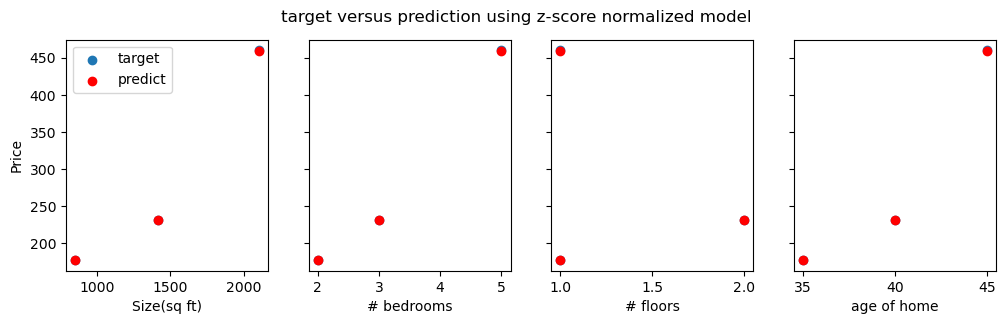

In [17]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color='red', label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()